Load the `ISLR2` and `tidyverse` packages.

In [1]:
# load packages
library(tidyverse)
library(ISLR2)
library(splines) 
library(vip)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




In [2]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [3]:
# load Auto data

glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

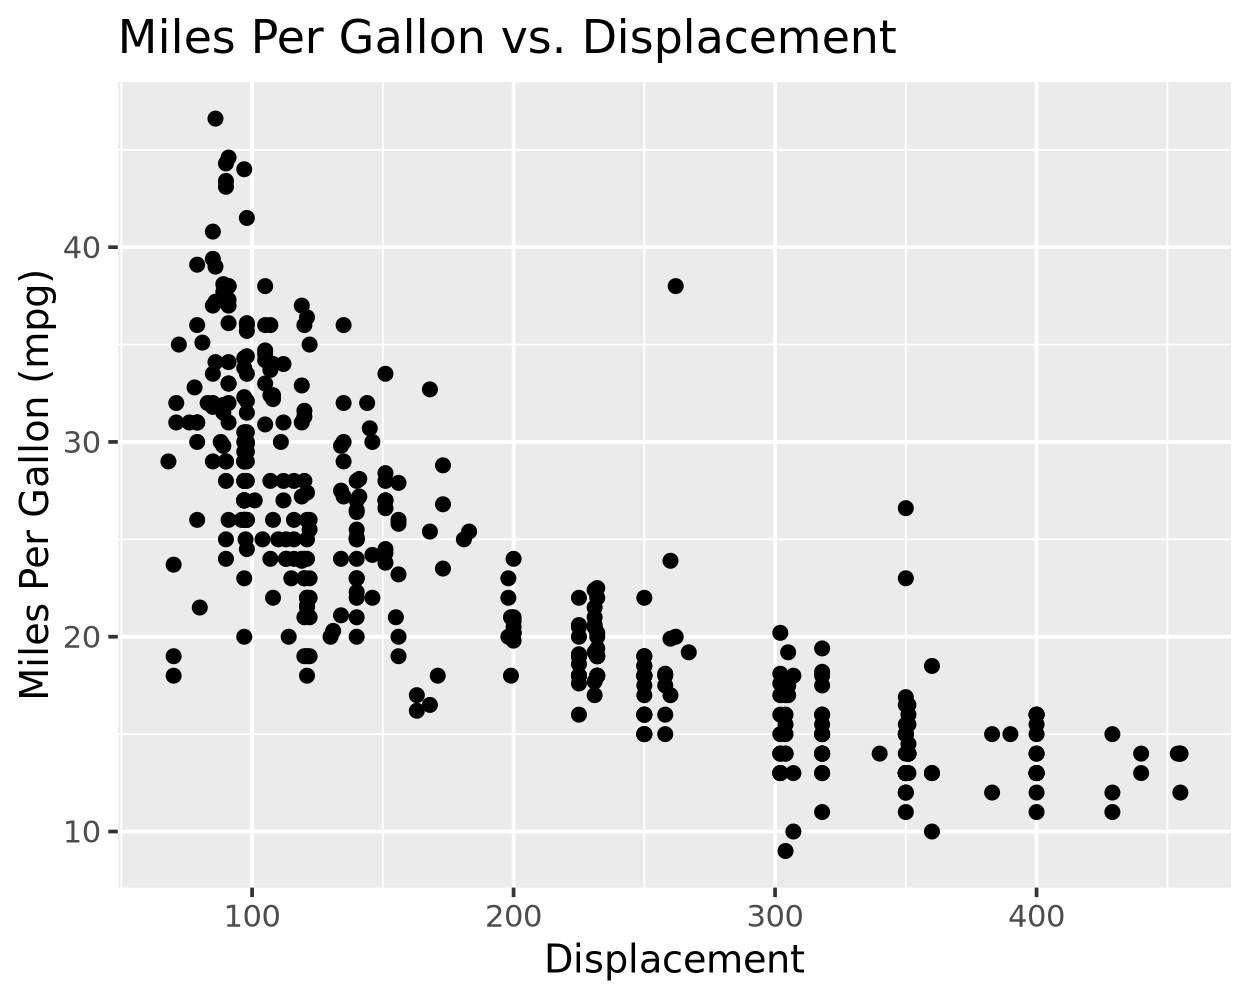

In [4]:
# create a scatter plot of mpg vs displacement
ggplot(Auto, aes(x = displacement, y = mpg)) +
    geom_point() + 
    labs(title = "Miles Per Gallon vs. Displacement",
         x = "Displacement", 
         y = "Miles Per Gallon (mpg)")


❓Does the relationship of `mpg` to `displacement` look linear?

From the scatter plot, we can see that the relationship between miles per gallon (mpg) and displacement does not appear to be linear. Instead, it shows a negative nonlinear trend, where mpg sharply decreases as displacement increases, but the rate of decrease begins to taper off at higher displacement values. 

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [8]:
# create preprocessing recipe 

mpg_recipe <- recipe(mpg ~ displacement + cylinders, data = Auto) %>%
    # convert 'cylinders' to a catagorical variable and then to dummy 
    step_mutate(cyl_cat = factor(cylinders)) %>%
    step_dummy(cyl_cat) %>%
    step_rm(cylinders) %>%
    # Apply a spline to `displacement`
    step_ns(displacement, deg_free = 5)


In [20]:
# Define the model specification
lm_spec <- linear_reg() %>%
  set_engine("lm")

# Create a workflow to combine the recipe and model
mod_workflow <- workflow() %>%
  add_recipe(mpg_recipe) %>%
  add_model(lm_spec)

# Fit the model to the data
mod_fit <- mod_workflow %>%
  fit(data = Auto)

# Print the summary of the fitted model
mod_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_mutate()
• step_dummy()
• step_rm()
• step_ns()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
      (Intercept)         cyl_cat_X4         cyl_cat_X5         cyl_cat_X6  
            21.32              14.53              16.36              12.69  
       cyl_cat_X8  displacement_ns_1  displacement_ns_2  displacement_ns_3  
            13.86             -13.09             -12.16             -20.60  
displacement_ns_4  displacement_ns_5  
           -25.76             -18.70  


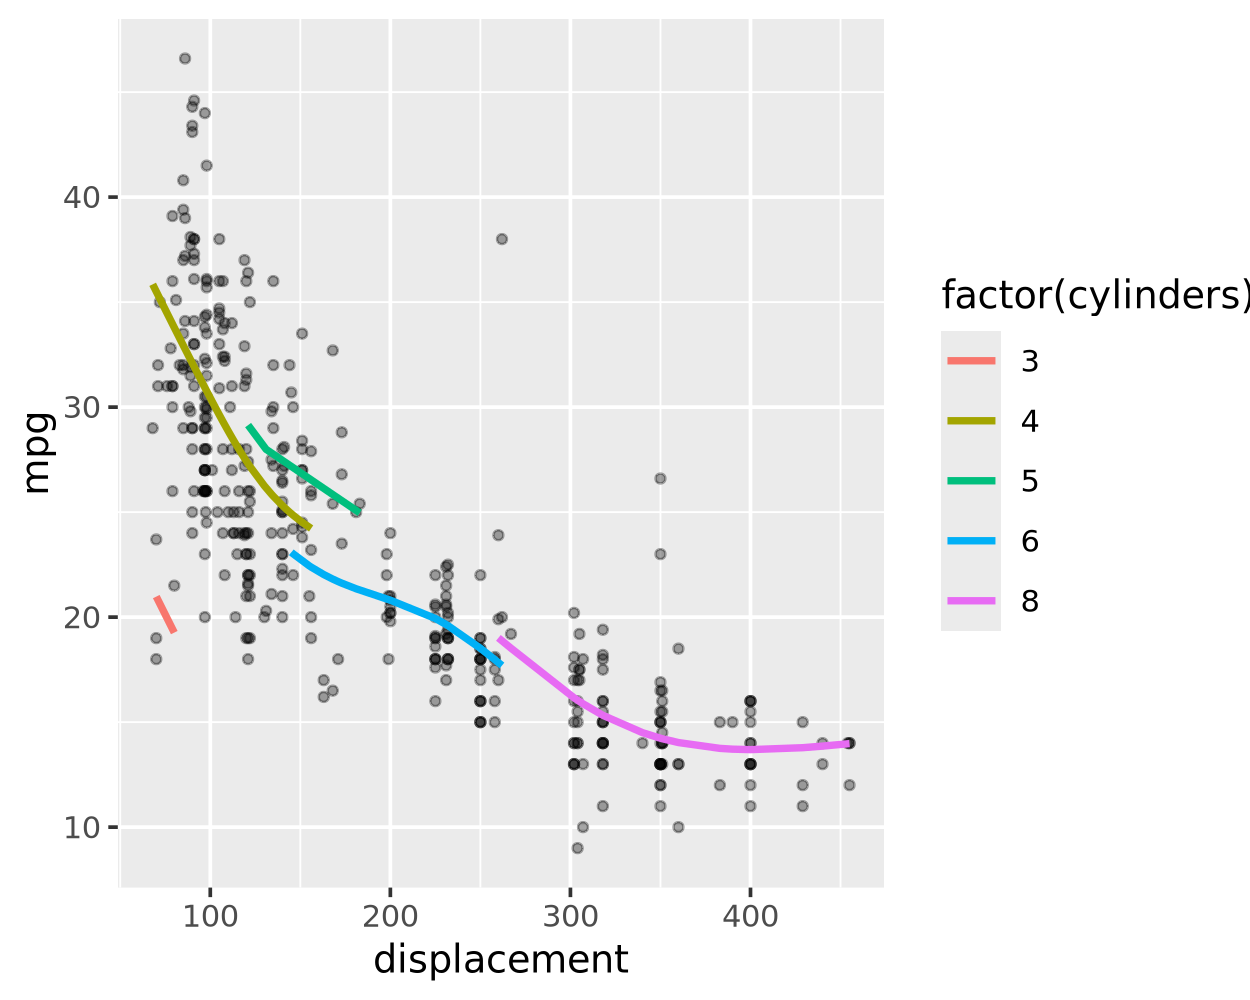

In [21]:
# Generate predictions using the raw data
predictions <- predict(mod_fit, new_data = Auto) %>%
  bind_cols(Auto)

# Plot the results
library(ggplot2)
predictions %>%
  ggplot(aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)